In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Load filtered_df
df = pd.read_csv("/home/mouren/Data/valid_exp/summary_count_exonhancers_bilan.tsv", sep="\t", header=0)
df = df[~df['Log2FC'].str.contains('#', na=False)] # Remove rows with no log2FC values 

df["Log2FC"] = df["Log2FC"].str.replace(',', '.')
df["Input_STD"] = df["Input_STD"].str.replace(',', '.')

df["Log2FC"] = pd.to_numeric(df["Log2FC"])
df["count_sequence_AVO4Exonhmaxi4"] = pd.to_numeric(df["count_sequence_AVO4Exonhmaxi4"])
df["Input_STD"] = pd.to_numeric(df["Input_STD"])

# removes input count reads less than 500 and standard deviation above 20
filtered_df = df[(df['count_sequence_AVO4Exonhmaxi4'] >= 500) & (df['Input_STD'] <= 20)]

/home/mouren/.local/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/home/mouren/.local/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, self.cat_axis] = adjusted_data
/home/mouren/.local/lib/python3.8/site-packages/seaborn/categorical.py:292: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To

CTRLEEP v.s. EEK: t-test independent samples with Bonferroni correction, P_val=1.650e-22 stat=-9.906e+00
CTRLEEN v.s. EEK: t-test independent samples with Bonferroni correction, P_val=8.737e-20 stat=-9.238e+00


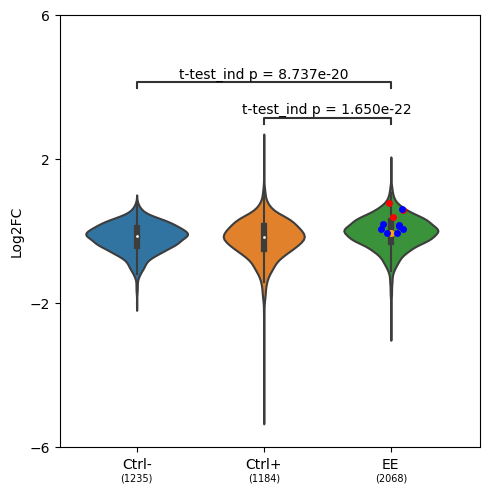

In [4]:
### PLOT RESULT EE VS CTRL
plt.figure(figsize=(5, 5))

categories_to_plot = ["CTRLEEN","CTRLEEP","EEK"]

ax = sns.violinplot(data=filtered_df, x='Category2', y='Log2FC',order=categories_to_plot, flierprops=dict(marker='o', markersize=5)) #, width=2) #,cut=0)

#plot luciferase dots 
good_luc = ['ENST00000299505.8_cds_5_EEK','ENST00000347529.7_cds_7_EEK','ENST00000373790.9_cds_21_EEK','ENST00000440232.7_cds_19_EEKAG']
mid_luc = ['ENST00000369611.4_cds_15_EEK',]
bad_luc = ['ENST00000406875.8_cds_10_EEKA','ENST00000398263.6_cds_2_EEKG', 'ENST00000254963.7_cds_4_EEKAG', 'ENST00000366993.7_cds_5_EEK','ENST00000311117.8_cds_19_EEK', 'ENST00000375719.7_cds_11_EEK', 'ENST00000313663.11_cds_20_EEK', 'ENST00000192788.6_cds_6_EEK']
highlight_good = filtered_df[filtered_df['ID'].isin(good_luc)]
highlight_mid = filtered_df[filtered_df['ID'].isin(mid_luc)]
highlight_bad = filtered_df[filtered_df['ID'].isin(bad_luc)]

sns.stripplot(data=highlight_good, x='Category2', y='Log2FC', order=categories_to_plot, color='red', marker='o', size=5, edgecolor='black')
sns.stripplot(data=highlight_mid, x='Category2', y='Log2FC', order=categories_to_plot, color='orange', marker='o', size=5, edgecolor='black')
sns.stripplot(data=highlight_bad, x='Category2', y='Log2FC', order=categories_to_plot, color='blue', marker='o', size=5, edgecolor='black')

### stats
# Reset y-axis limits to the original obtained before adding the stripplot
ax.set_ylim([-5.5, 3.5])

from statannot import add_stat_annotation
add_stat_annotation(ax, data=filtered_df, x='Category2', y='Log2FC', order= categories_to_plot,
                    box_pairs=[("CTRLEEN", "EEK"), ("CTRLEEP", "EEK")],
                    test='t-test_ind', text_format='full', loc='inside', verbose=1)

# Adjust x-axis limits to add space
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min - 0.5, x_max + 0.5)

### Display N
# put n above violins
category_counts = filtered_df['Category2'].value_counts()
for category in ax.get_xticklabels():
    cat_name = category.get_text()
    count = category_counts[cat_name]
    ax.text(category.get_position()[0], ax.get_ylim()[0] - 1.5, f'({count})', 
            ha='center', va='bottom', fontsize=7, color='black')

custom_labels = ["Ctrl-","Ctrl+","EE"]
ax.set_xticklabels(custom_labels) 
plt.xlabel(None)

##
plt.xticks(None)
y_ticks = ax.get_yticks()  # Get current y-ticks
ax.set_yticks(y_ticks[::2])

plt.ylabel('Log2FC')
plt.tight_layout()

plt.savefig("/home/mouren/Images/main_figures/fig4/starr_fc_ee_ctrl.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/home/mouren/Images/main_figures/fig4/starr_fc_ee_ctrl.png", format="png", bbox_inches="tight")

plt.show()

/tmp/ipykernel_1724346/2609961353.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cat_type'] = filtered_df.apply(assign_value, axis=1)


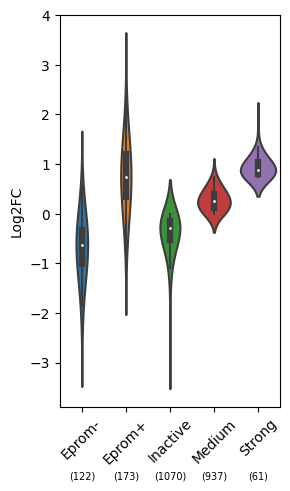

In [50]:
### EE in category compared to technicals controls 
categories_to_plot = ["CTRLEPN", "CTRLEPP", "EEK"]

def assign_value(row):
    if row['Category2'] not in ['EEK']:
        return row['Category2']
    elif row['Log2FC'] <= 0:
        return 'Inactive'
    elif 0 < row['Log2FC'] < 0.74:
        return 'Medium'
    elif row['Log2FC'] >= 0.74:
        return 'Strong'

filtered_df['cat_type'] = filtered_df.apply(assign_value, axis=1)

### plot 
plt.figure(figsize=(3, 5))

ax = sns.violinplot(data=filtered_df, x='cat_type', y='Log2FC',order=["CTRLEPN","CTRLEPP","Inactive","Medium","Strong"], flierprops=dict(marker='o', markersize=5),bw=1)

category_counts = filtered_df['cat_type'].value_counts()
for category in ax.get_xticklabels():
    cat_name = category.get_text()
    count = category_counts[cat_name]
    ax.text(category.get_position()[0], ax.get_ylim()[0] - 1.5, f'({count})', 
            ha='center', va='bottom', fontsize=7, color='black')

plt.xlabel(None)
plt.ylabel('Log2FC')
plt.xticks(rotation=45)

custom_labels = ["Eprom-","Eprom+","Inactive","Medium","Strong"]
ax.set_xticklabels(custom_labels) 
plt.xlabel(None)

plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ee_category.pdf", format="pdf", bbox_inches="tight")
plt.savefig("/home/mouren/Images/tls1/main_figures/fig4/starr_fc_ee_category.png", format="png", bbox_inches="tight")

plt.show()